# Python Bi Project

### Libraries

In [1]:
from pymongo import MongoClient
import pymongo
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
import matplotlib.pyplot as plt
import folium
from folium import plugins

In [3]:
import numpy as np
from folium.plugins import HeatMapWithTime as HMWT
from folium.plugins import HeatMap as HM

### Mongo query's

In [4]:
client = pymongo.MongoClient()
db = client.companies
colec = db.companies

In [5]:
client.list_database_names()

['admin', 'companies', 'config', 'local']

### Know my DataFrame

In [6]:
cole = colec.find({})
data = pd.DataFrame(cole)
data.head()

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,offices,milestones,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo
0,52cdef7c4bab8bd675297d8a,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,...,"[{'description': '', 'address1': '710 - 2nd Av...","[{'id': 5869, 'description': 'Wetpaint named i...",[],"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN
1,52cdef7c4bab8bd675297d8b,AdventNet,abc3,http://www.crunchbase.com/company/adventnet,http://adventnet.com,,,manageengine,enterprise,600.0,...,"[{'description': 'Headquarters', 'address1': '...",[],[],"[{'available_sizes': [[[150, 94], 'assets/imag...",[],[],NaN,NaN,NaN,NaN
2,52cdef7c4bab8bd675297d8c,Zoho,abc4,http://www.crunchbase.com/company/zoho,http://zoho.com,http://blogs.zoho.com/,http://blogs.zoho.com/feed,zoho,software,1600.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 388, 'description': 'Zoho Reaches 2 Mi...","[{'embed_code': '<object width=""430"" height=""2...",[],[{'external_url': 'http://www.online-tech-tips...,[],NaN,NaN,NaN,NaN
3,52cdef7c4bab8bd675297d8d,Digg,digg,http://www.crunchbase.com/company/digg,http://www.digg.com,http://blog.digg.com/,http://blog.digg.com/?feed=rss2,digg,news,60.0,...,"[{'description': None, 'address1': '135 Missis...","[{'id': 9588, 'description': 'Another Digg Exe...","[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[117, 150], 'assets/ima...",[{'external_url': 'http://www.sociableblog.com...,[],NaN,NaN,None,None
4,52cdef7c4bab8bd675297d8e,Facebook,facebook,http://www.crunchbase.com/company/facebook,http://facebook.com,http://blog.facebook.com,http://blog.facebook.com/atom.php,facebook,social,5299.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 108, 'description': 'Facebook adds com...",[],"[{'available_sizes': [[[150, 68], 'assets/imag...",[{'external_url': 'http://latimesblogs.latimes...,[],NaN,NaN,,"{'valuation_amount': 104000000000, 'valuation_..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18801 entries, 0 to 18800
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  18801 non-null  object 
 1   name                 18801 non-null  object 
 2   permalink            18801 non-null  object 
 3   crunchbase_url       18801 non-null  object 
 4   homepage_url         16895 non-null  object 
 5   blog_url             16890 non-null  object 
 6   blog_feed_url        16757 non-null  object 
 7   twitter_username     11383 non-null  object 
 8   category_code        16050 non-null  object 
 9   number_of_employees  8889 non-null   float64
 10  founded_year         13136 non-null  float64
 11  founded_month        7898 non-null   float64
 12  founded_day          5569 non-null   float64
 13  deadpooled_year      929 non-null    float64
 14  tag_list             14748 non-null  object 
 15  alias_list           8932 non-null  

In [8]:
category = list(colec.find({}, {'category_code':1}))

In [9]:
df_cat = pd.DataFrame(category)
df_cat

,_id,category_code
0,52cdef7c4bab8bd675297d8a,web
1,52cdef7c4bab8bd675297d8b,enterprise
2,52cdef7c4bab8bd675297d8c,software
3,52cdef7c4bab8bd675297d8d,news
4,52cdef7c4bab8bd675297d8e,social
...,...,...
18796,52cdef7f4bab8bd67529c6f6,advertising
18797,52cdef7f4bab8bd67529c6f7,software
18798,52cdef7f4bab8bd67529c6f8,web
18799,52cdef7f4bab8bd67529c6f9,software


C:\Users\EXECUTOR2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:572: UserWarning: The handle <BarContainer object of 41 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


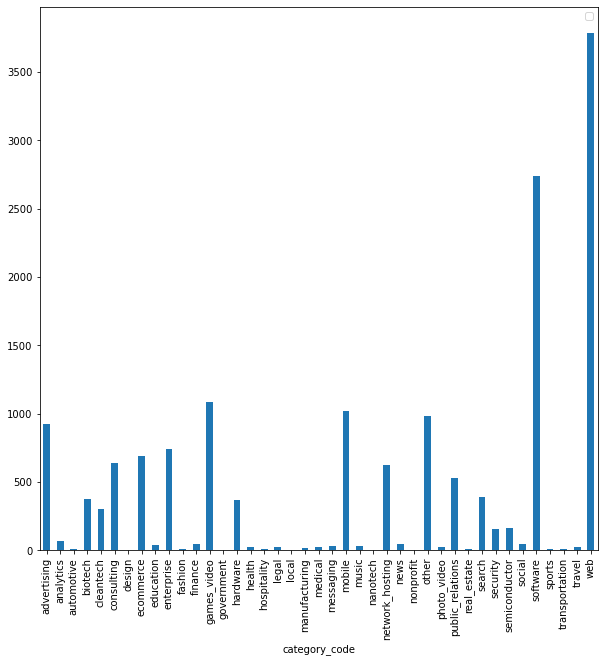

In [10]:
category_p = df_cat.groupby(['category_code']).agg('count')
category_p.plot.bar(figsize = (10, 10))
plt.show();

In [11]:
num = category_p.sort_values(by = '_id', ascending = False)
parte_a = num[:17]
parte_b =num[17:]


graph = pd.DataFrame(num)
graph

,_id
category_code,
web,3787
software,2736
games_video,1083
mobile,1018
other,986
advertising,928
enterprise,742
ecommerce,688
consulting,637


C:\Users\EXECUTOR2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:572: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


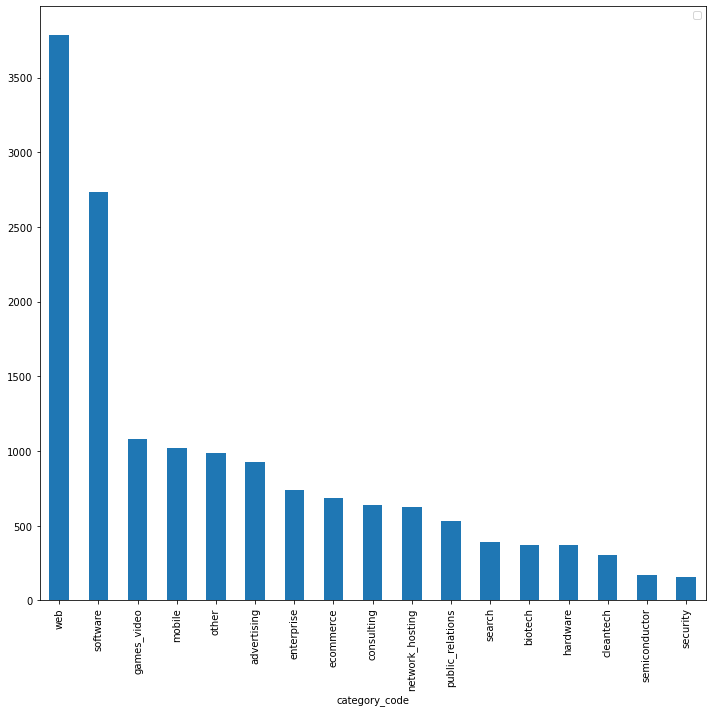

C:\Users\EXECUTOR2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:572: UserWarning: The handle <BarContainer object of 24 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


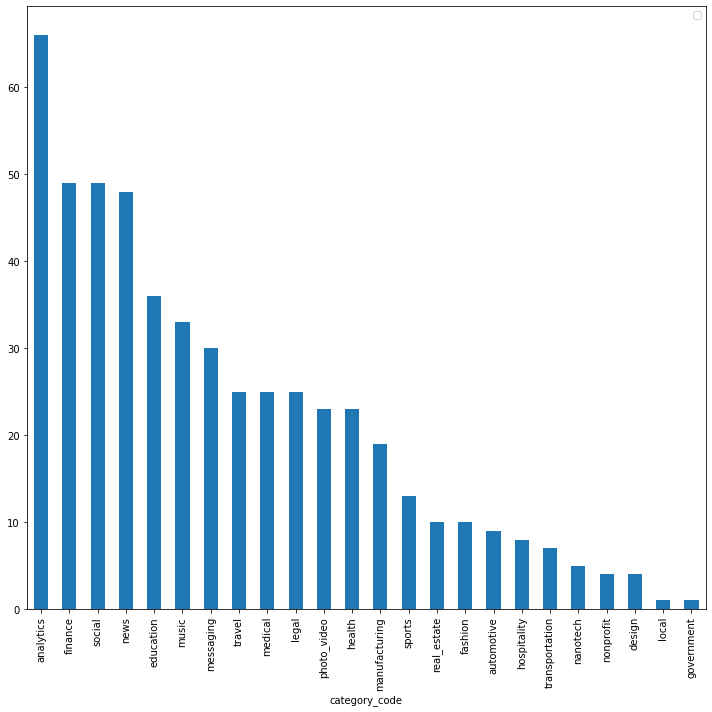

In [12]:
parte_a.plot.bar(figsize = (10,10))
plt.tight_layout()
plt.show();

parte_b.plot.bar(figsize = (10,10))
plt.tight_layout()
plt.show();

### Extract info

In [13]:
query = colec.find({"$and":[ {'category_code':'web'},
                             {'offices.country_code':'USA'},
                             {'offices':{'$size':1}}]},
                             {'name':1, 'offices':1})

In [14]:
df = pd.DataFrame(query)

In [15]:
df

,_id,name,offices
0,52cdef7c4bab8bd675297d90,Postini,"[{'description': None, 'address1': '959 Skyway..."
1,52cdef7c4bab8bd675297d91,Geni,"[{'description': 'Headquarters', 'address1': '..."
2,52cdef7c4bab8bd675297d93,Fox Interactive Media,"[{'description': '', 'address1': '407 N Maple ..."
3,52cdef7c4bab8bd675297d96,Gizmoz,"[{'description': None, 'address1': None, 'addr..."
4,52cdef7c4bab8bd675297d9b,eBay,"[{'description': 'Headquarters', 'address1': '..."
...,...,...,...
1731,52cdef7f4bab8bd67529c677,MediaPal,"[{'description': 'HQ', 'address1': '6100 Holly..."
1732,52cdef7f4bab8bd67529c696,Conversition,"[{'description': 'HQ', 'address1': '', 'addres..."
1733,52cdef7f4bab8bd67529c6d2,Atlantic BT,"[{'description': 'Main Office', 'address1': '8..."
1734,52cdef7f4bab8bd67529c6d9,iGuiders,"[{'description': '', 'address1': '23811 Chagri..."


In [16]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      1736 non-null   object
 1   name     1736 non-null   object
 2   offices  1736 non-null   object
dtypes: object(3)
memory usage: 40.8+ KB


(1736, 3)

In [17]:
flat = json_normalize(df.offices[0]) #not working

<ipython-input-17-c2a8c62004e9>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  flat = json_normalize(df.offices[0]) #not working


In [18]:
flatt = [json_normalize(i) for i in df['offices']]  #not working

<ipython-input-18-bd7f33d364e3>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  flatt = [json_normalize(i) for i in df['offices']]  #not working


In [23]:
#another flatten

def flatten(data, lst):
    for i in lst:
        df1 = pd.DataFrame(dict(data[i])).T
        lst = [str(j) for j in df1.columns]
        df1.columns = [i+'_'+k for k in lst]
        data = pd.concat([data, df1], axis = 1)
        data = data.drop(i, axis = 1)
    return data

In [25]:
col = ['offices']

flat = flatten(df, col)

flat

,_id,name,offices_0
0,52cdef7c4bab8bd675297d90,Postini,"{'description': None, 'address1': '959 Skyway ..."
1,52cdef7c4bab8bd675297d91,Geni,"{'description': 'Headquarters', 'address1': '9..."
2,52cdef7c4bab8bd675297d93,Fox Interactive Media,"{'description': '', 'address1': '407 N Maple D..."
3,52cdef7c4bab8bd675297d96,Gizmoz,"{'description': None, 'address1': None, 'addre..."
4,52cdef7c4bab8bd675297d9b,eBay,"{'description': 'Headquarters', 'address1': '2..."
...,...,...,...
1731,52cdef7f4bab8bd67529c677,MediaPal,"{'description': 'HQ', 'address1': '6100 Hollyw..."
1732,52cdef7f4bab8bd67529c696,Conversition,"{'description': 'HQ', 'address1': '', 'address..."
1733,52cdef7f4bab8bd67529c6d2,Atlantic BT,"{'description': 'Main Office', 'address1': '80..."
1734,52cdef7f4bab8bd67529c6d9,iGuiders,"{'description': '', 'address1': '23811 Chagrin..."


In [26]:
#creamos copia

copia = flat.copy()
total = flatten(copia, ['offices_0'])
total

,_id,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,52cdef7c4bab8bd675297d90,Postini,None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,52cdef7c4bab8bd675297d91,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,52cdef7c4bab8bd675297d93,Fox Interactive Media,,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,52cdef7c4bab8bd675297d96,Gizmoz,None,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,52cdef7c4bab8bd675297d9b,eBay,Headquarters,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...,...,...
1731,52cdef7f4bab8bd67529c677,MediaPal,HQ,6100 Hollywood Boulevard Hollywood,Suite 305,33024,Hollywood,FL,USA,None,None
1732,52cdef7f4bab8bd67529c696,Conversition,HQ,,,,New York City,NY,USA,40.7561,-73.987
1733,52cdef7f4bab8bd67529c6d2,Atlantic BT,Main Office,8015 Creedmoor Rd. Ste. 101,,27613,Raleigh,NC,USA,35.8969,-78.6807
1734,52cdef7f4bab8bd67529c6d9,iGuiders,,23811 Chagrin,Boulevard Suite 244,44122,Beachwood,OH,USA,None,None


In [27]:
webCA = total[total['offices_0_state_code'] == 'CA']
webCA = webCA.drop('_id', axis = 1)
webCA

,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,Headquarters,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...,...
1711,Pingsta,Main Headquarters,1700 Seaport Blvd.,,94063,Redwood City,CA,USA,37.5112,-122.201
1713,DeciZium,U.S. Headquarters,"111 N Market St, 648",,95113,San Jose,CA,USA,37.3378,-121.894
1722,Tagito,Headquarters,1 Stockbridge,,92656,Aliso Viejo,CA,USA,33.5646,-117.736
1723,Culture Jam,,2434 Lincoln Blvd,Floor 2,90291,Los Angeles,CA,USA,34.0137,-118.466


### Extract another info

In [28]:
query2=colec.find({"$and":[{'category_code': 'software'},
                           {'offices.country_code':'USA'},
                           {'offices':{'$size':1}}]},
                           {'name':1,'offices':1})

In [29]:
df2 = pd.DataFrame(query2)
df2

,_id,name,offices
0,52cdef7c4bab8bd675297d8c,Zoho,"[{'description': 'Headquarters', 'address1': '..."
1,52cdef7c4bab8bd675297e21,MotionDSP,"[{'description': '', 'address1': '700 Airport ..."
2,52cdef7c4bab8bd675297e24,RegOnline,"[{'description': 'The ACTIVE Network', 'addres..."
3,52cdef7c4bab8bd675297e30,GoingOn,"[{'description': 'GoingOn Networks, Inc.', 'ad..."
4,52cdef7c4bab8bd675297e3c,Bazaarvoice,"[{'description': 'Head Office', 'address1': '3..."
...,...,...,...
1303,52cdef7f4bab8bd67529c6f0,Intergy,"[{'description': '', 'address1': '11875 Dublin..."
1304,52cdef7f4bab8bd67529c6f2,Contemporary Computer Services,"[{'description': '', 'address1': '200 Knickerb..."
1305,52cdef7f4bab8bd67529c6f3,QSGI,"[{'description': '', 'address1': '400 Royal Pa..."
1306,52cdef7f4bab8bd67529c6f7,AfterLogic,"[{'description': 'Livingston', 'address1': 'P...."


In [30]:
flat2 = flatten(df2, col)

#creamos copias 2 
copia2 = flat2.copy()
total2 = flatten(copia2, ['offices_0'])
total2

,_id,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,52cdef7c4bab8bd675297d8c,Zoho,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.6929,-121.905
1,52cdef7c4bab8bd675297e21,MotionDSP,,700 Airport Blvd,,94010,Burlingame,CA,USA,None,None
2,52cdef7c4bab8bd675297e24,RegOnline,The ACTIVE Network,"10182 Telesis Court,",Suite 100,92121,San Diego,CA,USA,39.9195,-105.111
3,52cdef7c4bab8bd675297e30,GoingOn,"GoingOn Networks, Inc.",450 Sansome Street,12th Floor,94111,San Francisco,CA,USA,37.7823,-122.392
4,52cdef7c4bab8bd675297e3c,Bazaarvoice,Head Office,3900 N Capital of Texas Hwy,,78746,Austin,TX,USA,30.4075,-97.7177
...,...,...,...,...,...,...,...,...,...,...,...
1303,52cdef7f4bab8bd67529c6f0,Intergy,,11875 Dublin Boulevard,Suite A-201,94568,Dublin,CA,USA,37.7019,-121.937
1304,52cdef7f4bab8bd67529c6f2,Contemporary Computer Services,,200 Knickerbocker Avenue,,11716,Bohemia,NY,USA,40.7751,-73.0881
1305,52cdef7f4bab8bd67529c6f3,QSGI,,400 Royal Palm Way,,33480,Palm Beach,FL,USA,26.7053,-80.0414
1306,52cdef7f4bab8bd67529c6f7,AfterLogic,Livingston,P.O. Box 2096,,07039,Livingston,NJ,USA,40.793,-74.3236


In [31]:
softCA = total2[total2['offices_0_state_code'] == 'CA']
softCA = softCA.drop('_id', axis = 1)
softCA

,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Zoho,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.6929,-121.905
1,MotionDSP,,700 Airport Blvd,,94010,Burlingame,CA,USA,None,None
2,RegOnline,The ACTIVE Network,"10182 Telesis Court,",Suite 100,92121,San Diego,CA,USA,39.9195,-105.111
3,GoingOn,"GoingOn Networks, Inc.",450 Sansome Street,12th Floor,94111,San Francisco,CA,USA,37.7823,-122.392
5,GoLightly,None,9 Locust Ave.,,94941,Mill Valley,CA,USA,37.8986,-122.537
...,...,...,...,...,...,...,...,...,...,...
1288,SOA Software,HQ,12100 Wilshire Blvd,Suite 1800,90025,Los Angeles,CA,USA,None,None
1289,Arkeia Software,Corporate Headquarters,1808 Aston Ave,,92008,Carlsbad,CA,USA,33.1326,-117.293
1290,Instill,HQ,777 Mariners Island Boulevard,Suite 400,94404,San Mateo,CA,USA,None,None
1295,Savvion,Corporate Headquarters,5104 Old Ironsides Drive,Suite 205,95054,Santa Clara,CA,USA,37.4035,-121.98


In [32]:
web_soft = pd.concat([webCA, softCA])
web_soft

,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,Headquarters,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...,...
1288,SOA Software,HQ,12100 Wilshire Blvd,Suite 1800,90025,Los Angeles,CA,USA,None,None
1289,Arkeia Software,Corporate Headquarters,1808 Aston Ave,,92008,Carlsbad,CA,USA,33.1326,-117.293
1290,Instill,HQ,777 Mariners Island Boulevard,Suite 400,94404,San Mateo,CA,USA,None,None
1295,Savvion,Corporate Headquarters,5104 Old Ironsides Drive,Suite 205,95054,Santa Clara,CA,USA,37.4035,-121.98


In [33]:
web_soft = web_soft.drop('offices_0_description', axis = 1)
web_soft

,name,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...
1288,SOA Software,12100 Wilshire Blvd,Suite 1800,90025,Los Angeles,CA,USA,None,None
1289,Arkeia Software,1808 Aston Ave,,92008,Carlsbad,CA,USA,33.1326,-117.293
1290,Instill,777 Mariners Island Boulevard,Suite 400,94404,San Mateo,CA,USA,None,None
1295,Savvion,5104 Old Ironsides Drive,Suite 205,95054,Santa Clara,CA,USA,37.4035,-121.98


In [34]:
#creando una nueva copia para mapear

mapa = web_soft.copy()

In [35]:
mapa = mapa.dropna(subset = ['offices_0_latitude', 'offices_0_longitude'])
mapa

,name,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...
1282,Embarcadero Technologies,100 California Street,12th Floor,94111,San Francisco,CA,USA,37.7939,-122.398
1283,Muniservices,3433 West Shaw Avenue,,93711,Fresno,CA,USA,36.8082,-119.855
1289,Arkeia Software,1808 Aston Ave,,92008,Carlsbad,CA,USA,33.1326,-117.293
1295,Savvion,5104 Old Ironsides Drive,Suite 205,95054,Santa Clara,CA,USA,37.4035,-121.98


In [36]:
mapa = mapa[['name', 'offices_0_latitude', 'offices_0_longitude']]
mapa

,name,offices_0_latitude,offices_0_longitude
0,Postini,37.5069,-122.248
1,Geni,34.0904,-118.393
2,Fox Interactive Media,34.0762,-118.394
3,Gizmoz,37.4841,-122.169
4,eBay,37.295,-121.93
...,...,...,...
1282,Embarcadero Technologies,37.7939,-122.398
1283,Muniservices,36.8082,-119.855
1289,Arkeia Software,33.1326,-117.293
1295,Savvion,37.4035,-121.98


In [37]:
mapa2 = mapa['name']
mapa2.value_counts()

Marketbright          2
Big Stage             2
Galaxy                2
InterKnowlogy         2
Native Instinct       2
                     ..
EchoSign              1
ID Analytics          1
Keibi Technologies    1
Reframe It            1
Flickr                1
Name: name, Length: 897, dtype: int64

### Generate location

In [92]:
def mapEbay(location = [37.295, -121.93], zoom_start = 12):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [93]:
prueba = mapEbay()

In [94]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 10,
                  max_zoom = 13).add_to(prueba)

In [87]:
prueba

In [91]:
prueba

In [96]:
prueba

In [121]:
def mapBis(location = [37.3184268, -121.912587], zoom_start = 17):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [122]:
prueba = mapBis()

In [123]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 10,
                  max_zoom = 13).add_to(prueba)

prueba

In [124]:
prueba.save('mapaBusiness.html')

### Sector web & videogames

In [42]:
query3 = colec.find({"$and":[{'category_code': 'games_video'},
                             {'offices.country_code':'USA'},
                             {'offices':{'$size':1}}]},
                             {'name':1,'offices':1})

In [43]:
df3 = pd.DataFrame(query3)
df3

,_id,name,offices
0,52cdef7c4bab8bd675297d92,Flektor,"[{'description': None, 'address1': '8536 Natio..."
1,52cdef7c4bab8bd675297d99,Lala,"[{'description': 'Lala Headquarters', 'address..."
2,52cdef7c4bab8bd675297d9d,Joost,"[{'description': '', 'address1': '100 5th Ave ..."
3,52cdef7c4bab8bd675297daa,Sparter,"[{'description': None, 'address1': None, 'addr..."
4,52cdef7c4bab8bd675297dab,Kyte,"[{'description': None, 'address1': '442 Post S..."
...,...,...,...
482,52cdef7f4bab8bd67529c578,California 7 Studios,"[{'description': 'HQ', 'address1': '3415 S Sep..."
483,52cdef7f4bab8bd67529c5bc,MechaWorks,"[{'description': 'Headquarters', 'address1': '..."
484,52cdef7f4bab8bd67529c5e3,DJ Nitrogen,"[{'description': '', 'address1': '11 Lupine Av..."
485,52cdef7f4bab8bd67529c5e8,Shape Games,"[{'description': '', 'address1': '901 North Pi..."


In [44]:
flat3 = flatten(df3, col)

#creamos copias 2 
copia3 = flat3.copy()
total3 = flatten(copia3, ['offices_0'])

In [45]:
videogameCA = total3[total3['offices_0_state_code'] == 'CA']
videogameCA = videogameCA.drop('_id', axis = 1)
videogameCA

,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Flektor,None,"8536 National Blvd, Suite A",None,90232,Culver City,CA,USA,34.026,-118.38
1,Lala,Lala Headquarters,209 Hamilton Ave,Suite #200,94301,Palo Alto,CA,USA,37.4512,-122.154
4,Kyte,None,442 Post Street,10th Floor,94102,San Francisco,CA,USA,37.7885,-122.409
5,Veoh,,10180 Telesis Court Suite,Suite 400,92121,San Diego,CA,USA,32.9023,-117.208
6,YouTube,Corporate Headquarters,901 Cherry Ave,,94066,San Bruno,CA,USA,37.628,-122.427
...,...,...,...,...,...,...,...,...,...,...
473,CompuExpert,,11 Rancho Circle,,92630,Lake Forest,CA,USA,33.6735,-117.669
474,Digital Interactive,,444 West Ocean Boulevard,Suite 1070,90802,Long Beach,CA,USA,33.7667,-118.198
482,California 7 Studios,HQ,3415 S Sepulveda Blvd,,90034,Los Angeles,CA,USA,None,None
483,MechaWorks,Headquarters,830 Stewart Dr,,94087,Sunnyvale,CA,USA,37.3834,-122.009


In [46]:
web_videogames = pd.concat([webCA, videogameCA])
web_videogames

,name,offices_0_description,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,Headquarters,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,Headquarters,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...,...
473,CompuExpert,,11 Rancho Circle,,92630,Lake Forest,CA,USA,33.6735,-117.669
474,Digital Interactive,,444 West Ocean Boulevard,Suite 1070,90802,Long Beach,CA,USA,33.7667,-118.198
482,California 7 Studios,HQ,3415 S Sepulveda Blvd,,90034,Los Angeles,CA,USA,None,None
483,MechaWorks,Headquarters,830 Stewart Dr,,94087,Sunnyvale,CA,USA,37.3834,-122.009


In [47]:
web_videogames = web_videogames.drop('offices_0_description', axis = 1)
web_videogames

,name,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...
473,CompuExpert,11 Rancho Circle,,92630,Lake Forest,CA,USA,33.6735,-117.669
474,Digital Interactive,444 West Ocean Boulevard,Suite 1070,90802,Long Beach,CA,USA,33.7667,-118.198
482,California 7 Studios,3415 S Sepulveda Blvd,,90034,Los Angeles,CA,USA,None,None
483,MechaWorks,830 Stewart Dr,,94087,Sunnyvale,CA,USA,37.3834,-122.009


In [48]:
mapa_vid = web_videogames.copy()

In [49]:
mapa_vid = mapa_vid.dropna(subset = ['offices_0_latitude', 'offices_0_longitude'])
mapa_vid

,name,offices_0_address1,offices_0_address2,offices_0_zip_code,offices_0_city,offices_0_state_code,offices_0_country_code,offices_0_latitude,offices_0_longitude
0,Postini,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.5069,-122.248
1,Geni,9229 W. Sunset Blvd.,,90069,West Hollywood,CA,USA,34.0904,-118.393
2,Fox Interactive Media,407 N Maple Dr,,90210,Beverly Hills,CA,USA,34.0762,-118.394
3,Gizmoz,None,None,None,Menlo Park,CA,USA,37.4841,-122.169
4,eBay,2145 Hamilton Avenue,,95125,San Jose,CA,USA,37.295,-121.93
...,...,...,...,...,...,...,...,...,...
471,Mondo Media,550 15TH ST,STE 31,94103,San Francisco,CA,USA,37.7642,-122.402
473,CompuExpert,11 Rancho Circle,,92630,Lake Forest,CA,USA,33.6735,-117.669
474,Digital Interactive,444 West Ocean Boulevard,Suite 1070,90802,Long Beach,CA,USA,33.7667,-118.198
483,MechaWorks,830 Stewart Dr,,94087,Sunnyvale,CA,USA,37.3834,-122.009


In [50]:
mapa_vid = mapa_vid[['name', 'offices_0_latitude', 'offices_0_longitude']]
mapa_vid

,name,offices_0_latitude,offices_0_longitude
0,Postini,37.5069,-122.248
1,Geni,34.0904,-118.393
2,Fox Interactive Media,34.0762,-118.394
3,Gizmoz,37.4841,-122.169
4,eBay,37.295,-121.93
...,...,...,...
471,Mondo Media,37.7642,-122.402
473,CompuExpert,33.6735,-117.669
474,Digital Interactive,33.7667,-118.198
483,MechaWorks,37.3834,-122.009


### Univision

In [51]:
def mapUnivision(location = [33.9779, -118.393], zoom_start = 20):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [52]:
prueba2 = mapUnivision()

In [53]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 1,
                  max_zoom = 200).add_to(prueba2)

prueba2

### Walt Disney Company

In [54]:
def mapWaltDisney(location = [34.1568, -118.325], zoom_start = 20):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [55]:
prueba3 = mapWaltDisney()

In [56]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 1,
                  max_zoom = 200).add_to(prueba3)

prueba3

### Blizard Entertaiment

In [57]:
def mapBlizzard(location = [33.658063, -117.767187], zoom_start = 20):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [58]:
prueba4 = mapBlizzard()

In [59]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 1,
                  max_zoom = 200).add_to(prueba4)

prueba4

### Machinima, INC

In [60]:
def mapMachinima(location = [34.152438, -118.337813], zoom_start = 20):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [61]:
prueba5 = mapMachinima()

In [62]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 1,
                  max_zoom = 200).add_to(prueba5)

prueba5

### Warner Bros

In [63]:
def mapWarner(location = [34.149313, -118.337688], zoom_start = 20):
    
    base = folium.Map(location = location, 
                      control_scale = True,
                      zoom_start = zoom_start)
    
    return base

In [64]:
prueba6 = mapWarner()

In [65]:
HM(data = mapa[['offices_0_latitude', 'offices_0_longitude']],
                  radius = 1,
                  max_zoom = 200).add_to(prueba6)

prueba6

In [66]:
prueba.save('mapaEbay.html') #guarda